# cosmic rejection which is external to our analysis

In [1]:
import sys; sys.path.insert(0, '../'); sys.path.insert(0, '../analysis_notes/mupClassification/'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
import seaborn as sns;sns.set(style="white", color_codes=True ,font_scale=2);
%matplotlib inline

In [9]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/ExternalCosmicRemoval/'

In [10]:
pandora_pairs = dict()
pandoraNu_pairs , pandoraCosmic_pairs = dict(), dict()
path = '/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/'
for method in ['with_pandoraCosmic_pass','without_pandoraCosmic_pass']:
    pandora_pairs[method] = pd.read_csv(path + method + '/erez_corsika_open_cmc_pandora_vertices.csv')
    pandoraNu_pairs[method] = pandora_pairs[method][pandora_pairs[method].isPandoraNu==True]
    pandoraCosmic_pairs[method] = pandora_pairs[method][pandora_pairs[method].isPandoraCosmic==True]
    print len(pandoraCosmic_pairs[method]),'pandoraCosmic pairs',len(pandoraNu_pairs[method]),'pandoraNu pairs','in',method

171 pandoraCosmic pairs 16 pandoraNu pairs in with_pandoraCosmic_pass
171 pandoraCosmic pairs 34 pandoraNu pairs in without_pandoraCosmic_pass


In [11]:
samples = [pandoraCosmic_pairs['with_pandoraCosmic_pass'],pandoraNu_pairs['with_pandoraCosmic_pass'],pandoraNu_pairs['without_pandoraCosmic_pass']]
labels = ['pandoraCosmic pairs','pandoraNu pairs with pandoraCosmic removal pass','pandoraNu pairs without pandoraCosmic removal pass']
colors = ['teal','tomato','black']

# inter-track separation distance

saved file  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/ExternalCosmicRemoval/separation_distance_with_without_pandoraCosmicPass.pdf


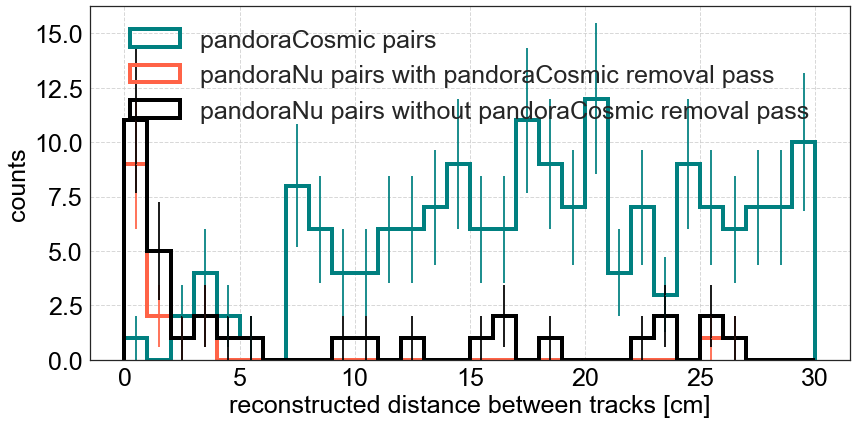

In [12]:
fig,ax=plt.subplots(figsize=(12,6))
for sample,label,color in zip(samples,labels,colors):
    d = sample['distance']
    h,bins,_ = plt.hist(d 
                        , bins=np.linspace(0,30,31)
                        ,color=color,histtype='step',linewidth=4,label=label
                       )
    mid = bins[1:] - 0.5*(bins[1]-bins[0])
    plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color=color , ecolor=color, capthick=2)
set_axes(ax,'reconstructed distance between tracks [cm]' , 'counts'
#          ,xticks=[3,6,9,12]
         ,do_add_grid=True,do_add_legend=True,legend_loc='upper center')
plt.tight_layout()
plt.savefig(figures_path+'separation_distance.pdf')
print 'saved file ',figures_path+'separation_distance_with_without_pandoraCosmicPass.pdf'

41681 pandoraCosmic pairs 5224 pandoraNu pairs
saved file  /Users/erezcohen/Desktop/Projects/uBoone/write-ups/RejectingCosBGInLArTPC/Figures/ExternalCosmicRemoval/separation_distance.pdf


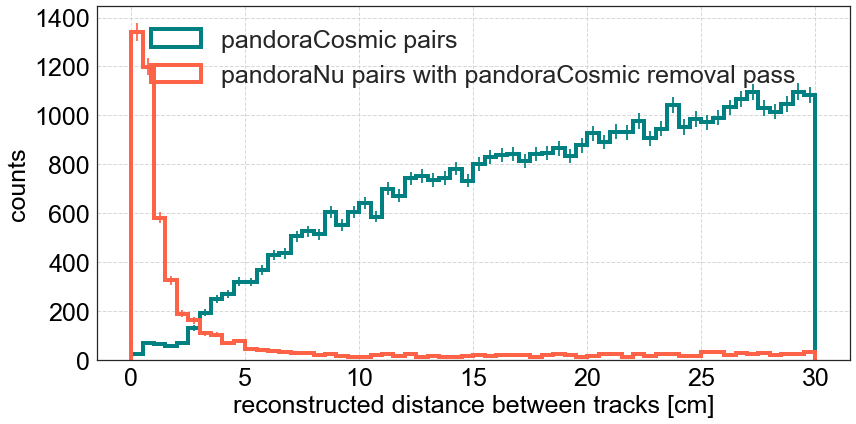

In [7]:
pandora_pairs = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/pandora_pairs/prodcosmics_corsika_cmc_uboone_mcc8.4_2018_01_29_vertices.csv')
pandoraNu_pairs = pandora_pairs[pandora_pairs.isPandoraNu==True]
pandoraCosmic_pairs = pandora_pairs[pandora_pairs.isPandoraCosmic==True]
print len(pandoraCosmic_pairs),'pandoraCosmic pairs',len(pandoraNu_pairs),'pandoraNu pairs'
samples = [pandoraCosmic_pairs,pandoraNu_pairs]
labels = ['pandoraCosmic pairs','pandoraNu pairs with pandoraCosmic removal pass']
colors = ['teal','tomato']
fig,ax=plt.subplots(figsize=(12,6))
for sample,label,color in zip(samples,labels,colors):
    d = sample['distance']
    h,bins,_ = plt.hist(d 
                        , bins=np.linspace(0,30,61)
                        ,color=color,histtype='step',linewidth=4,label=label
                       )
    mid = bins[1:] - 0.5*(bins[1]-bins[0])
    plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color=color , ecolor=color, capthick=2)
set_axes(ax,'reconstructed distance between tracks [cm]' , 'counts'
         ,do_add_grid=True,do_add_legend=True,legend_loc='upper center')
plt.tight_layout()
plt.savefig(figures_path+'separation_distance.pdf')
print 'saved file ',figures_path+'separation_distance.pdf'